# SOMETHING ABOUT IRIS

## INPUT PARAMETERS HERE

In [153]:
# DATA PARAMETERS
random_seed = 42
som_shape = (1, 3)
sigma = 0.5
lr = 0.1
max_epochs = 20000
window='gaussian' # gaussian, mexican_hat, bubble, triangle
file_name = 'iris.data'
var_types = {'petallength' : 'float',
             'petalwidth' : 'float',
             'sepallength' : 'float',
             'sepalwidth' : 'float',
             'flower' : 'str'}
my_cols = ['petallength', 'petalwidth', 'sepallength', 'sepalwidth']

In [154]:
import os

import minisom
import numpy
import pandas
import seaborn
from matplotlib import pyplot

In [155]:
# IMPORT AND CONVERT
notebook_dir = os.getcwd()
root_dir = os.path.dirname(notebook_dir)
data_dir = os.path.join(root_dir, 'datasets')
iris_file = os.path.join(data_dir, file_name)
df = pandas.read_csv(iris_file)
for input_col in var_types.keys():
    df[input_col] = df[input_col].astype(var_types[input_col])


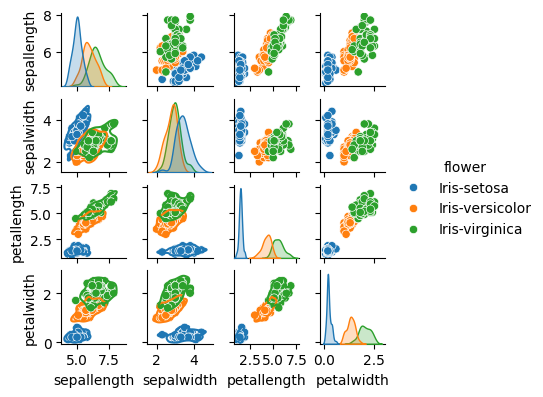

In [156]:
# SCATTER PLOT
g = seaborn.pairplot(df, hue='flower', height=1.0, diag_kind='kde')
_ = g.map_lower(seaborn.kdeplot, levels=1, color=".2")

## SOM COOKING

In [157]:
data: numpy.ndarray = df[my_cols].to_numpy()

# STANDARD SCALER TABADJARA
data_normalized: numpy.ndarray = (data - numpy.mean(data, axis=0)) / numpy.std(data, axis=0)

# TRAINING THE SOUND
som = minisom.MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=sigma, learning_rate=lr, neighborhood_function=window, random_seed=random_seed)

som.train_batch(data, max_epochs, verbose=True)

 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 0.6501506678774236


In [158]:
# each neuron represents a cluster
winner_coordinates = numpy.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = numpy.ravel_multi_index(winner_coordinates, som_shape)

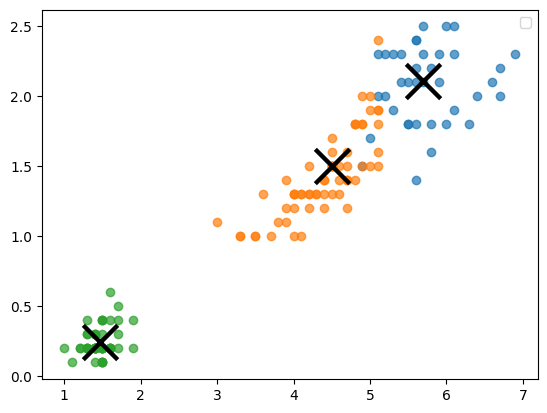

In [159]:
# plotting the clusters using the first 2 dimentions of the data
for c in numpy.unique(cluster_index):
    pyplot.scatter(data[cluster_index == c, 0], data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    pyplot.scatter(centroid[:, 0], centroid[:, 1], marker='x', s=5, linewidths=35, color='k')
_ = pyplot.legend([])